# GDP and CO2 in the worldwide


In [1]:
# For avoiding memory leak when working with K-means
import os
os.environ["OMP_NUM_THREADS"] = '1'

---


In [2]:
# Importing our libs
import matplotlib.pyplot as plot
import pandas as pd
import sklearn.cluster as skl
import sklearn.model_selection as training
import sklearn.metrics as metrics
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import silhouette_visualizer

In [3]:
# Fisrt let's recap the information of 100 countries
countries_gpd_CO2 = pd.DataFrame(columns = ['name','id', 'GDP', 'CO2'])
countries_gpd_CO2

import requests
# URL of the Worldbanck API of countries
url = "https://api.worldbank.org/v2/country?format=json&per_page=150&incomeLevel=LIC;MIC;HIC"

# GET
response = requests.get(url)

# Checking the response
if response.status_code == 200:
    # Obtaining all the data in json format
    data = response.json()
    
    # Taking all the countries names
    countries_id = [country['id'] for country in data[1]]
    countries_name = [country['name'] for country in data[1]]
else:
    print("Error in API:", response.status_code)
    


In [4]:
len(countries_id)

150

In [5]:
index = 0
while len(countries_gpd_CO2) < 100 and index < len(countries_id):
    country_code = countries_id[index]
    country_name = countries_name[index]
    
    # Obtener los datos del PIB del país
    gdp_url = f"https://api.worldbank.org/v2/country/{country_code}/indicator/NY.GDP.MKTP.CD?format=json"
    gdp_response = requests.get(gdp_url)
    
    # Obtener los datos de emisiones de CO2 del país
    co2_url = f"https://api.worldbank.org/v2/country/{country_code}/indicator/EN.ATM.CO2E.KT?format=json"
    co2_response = requests.get(co2_url)
    
    if co2_response.status_code == 200 and gdp_response.status_code == 200:
        gdp_data = gdp_response.json()[1]
        co2_data = co2_response.json()[1]
        
        if gdp_data and co2_data:
            # Obtener el valor más reciente del PIB
            latest_gdp = next((data['value'] for data in gdp_data if data['value']), None)

            # Obtener el valor más reciente de las emisiones de CO2
            latest_co2 = next((data['value'] for data in co2_data if data['value']), None)

            if latest_gdp and latest_co2:
                new_row = {'name': country_name,'id': country_code, 'GDP': latest_gdp, 'CO2': latest_co2}

                countries_gpd_CO2 = pd.concat([countries_gpd_CO2, pd.DataFrame(new_row, index=[len(countries_gpd_CO2) ])], axis=0)

            else:
                print(f"No complete info about {country_name}")
        else:
            print(f"No correct info about {country_name}")
    else:
        print(f"No info about {country_name}")
        
    index += 1


No complete info about Aruba
No complete info about American Samoa
No complete info about Bermuda
No complete info about Channel Islands
No complete info about Curacao
No complete info about Cayman Islands
No complete info about Faroe Islands
No complete info about Gibraltar
No complete info about Greenland
No complete info about Guam
No complete info about Hong Kong SAR, China
No complete info about Isle of Man


In [6]:
countries_gpd_CO2

,name,id,GDP,CO2
0,Afghanistan,AFG,1.478686e+10,6075.230
1,Angola,AGO,6.740429e+10,25212.900
2,Albania,ALB,1.825579e+10,4829.200
3,Andorra,AND,3.330282e+09,501.848
4,United Arab Emirates,ARE,4.150216e+11,188858.600
...,...,...,...,...
95,Lao PDR,LAO,1.882715e+10,18709.900
96,Lebanon,LBN,2.313194e+10,27946.500
97,Liberia,LBR,3.509000e+09,1182.000
98,Libya,LBY,4.281747e+10,56795.700


In [7]:
# Let's save that into a csv 
countries_gpd_CO2.to_csv("GPD-and-CO2-of-countries.csv", index = False)

C:\Users\MrJel\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


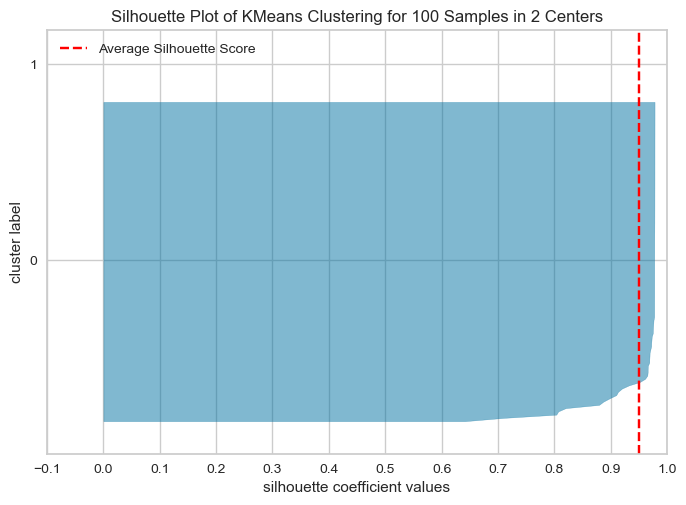

C:\Users\MrJel\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


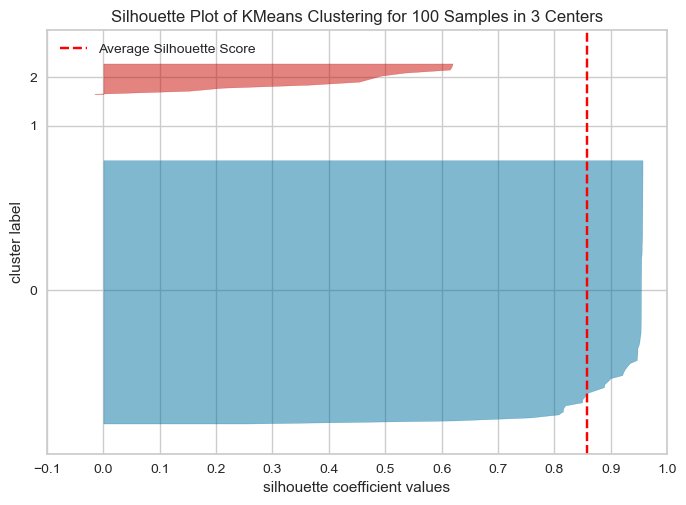

C:\Users\MrJel\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


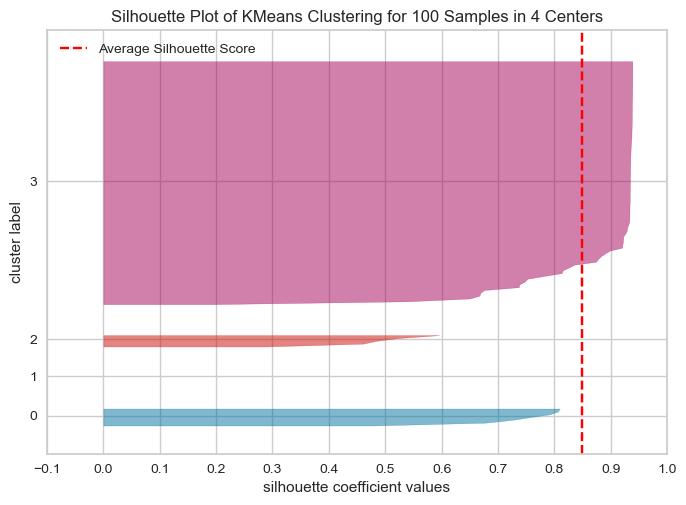

C:\Users\MrJel\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


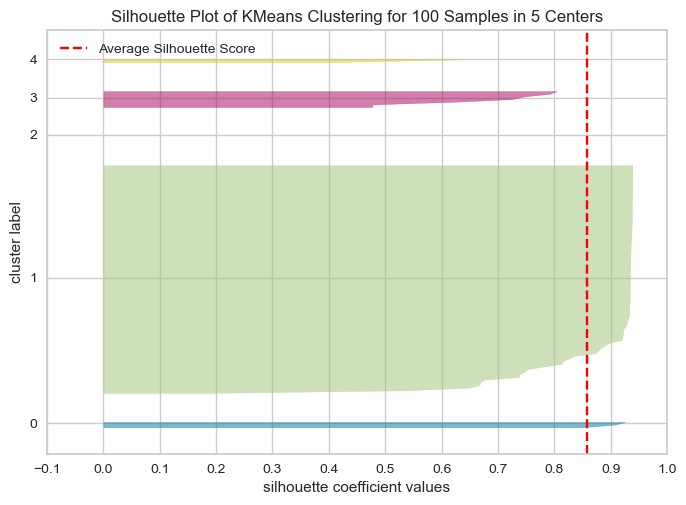

In [ ]:
# It's time for our model to be trained to classify and see uwu
# Silhouette
gpd_CO2 = countries_gpd_CO2[['GDP', 'CO2']]

for k in range(2,11):
    silhouette_visualizer(skl.KMeans(k, random_state=42), gpd_CO2, colors='yellowbrick')

In [ ]:
# elbow
#El Codo

model = skl.KMeans()
visualizer = KElbowVisualizer(model, k=(1, 11))

visualizer.fit(gpd_CO2) 
visualizer.show() 

plot.show()

In [ ]:
# So k is going to have a value of 3
k = 3
kmeansModel = skl.KMeans(n_clusters=k)
# loading data
#Carga los datos
kmeansModel.fit(gpd_CO2)

In [ ]:
#Centroids
centroids = kmeansModel.cluster_centers_
centroids

In [ ]:
# Label
labels = kmeansModel.predict(gpd_CO2)


In [ ]:
#Agrega al frame de datos una columna para las etiquetas de clasificación
countries_gpd_CO2['label'] = labels
countries_gpd_CO2

In [ ]:
# Let's save that into a csv 
countries_gpd_CO2.to_csv("GPD-and-CO2-of-countries-label.csv", index = False)

In [ ]:
# Lets plot our data
colors = ['red','blue','pink','orange']
centroids_colors = []
data_colors = []

for label in labels:
    data_colors.append(colors[label]) # red or blue
    
for  i in range(len(centroids)):
    centroids_colors.append(colors[i]) # red or blue

In [ ]:
#Visualization
ax = plot.axes()
ax.scatter(countries_gpd_CO2['GDP'], countries_gpd_CO2['CO2'], c=data_colors, marker='o', s=40)
ax.scatter(centroids[:,0], centroids[:,1],c=centroids_colors, marker='+', s=200)
plot.xlabel('GPD')
plot.ylabel('CO2')
plot.title('GPD - CO2 ')
plot.grid(color='gray', linestyle='--', linewidth = 0.5)
plot.show()

In [ ]:
# Also let's see in our map
import geopandas

In [ ]:
# Separating for countries
red_group = countries_gpd_CO2[countries_gpd_CO2['label'] == 1]
blue_group = countries_gpd_CO2[countries_gpd_CO2['label'] == 0]
pink_group = countries_gpd_CO2[countries_gpd_CO2['label'] == 2]
pink_group

In [ ]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
ax = world.plot()
#Changing name of Korea

pink_group.at[93, 'name'] = 'South Korea'

for country in red_group['name']:
    world[world.name == country].plot(color='red',ax=ax)
    
for country in pink_group['name']:
    world[world.name == country].plot(color='pink',ax=ax)

plot.show()
